In [14]:
import pandas as pd
import plotly.graph_objects as go

# Sample DataFrame
df = pd.DataFrame({
    'x1': [2, 3, 4, 1, 2, 3],
    'x2': [1, 2, 4, 5, 6, 7],
    'y': [1, 1, 1, 0, 0, 0]
})

df

,x1,x2,y
0,2,1,1
1,3,2,1
2,4,4,1
3,1,5,0
4,2,6,0
5,3,7,0


In [15]:
# Define marker styles based on 'y' values
marker_symbols = df['y'].map({1: 'x', 0: 'x'})  # or any other symbol you prefer
marker_colors = df['y'].map({1: 'red', 0: 'blue'})

# Create the figure
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(
    x=df['x1'],
    y=df['x2'],
    mode='markers',
    name='Data Points',
    marker=dict(symbol=marker_symbols, color=marker_colors, size=10)
))

# Show the figure
fig.show()

In [16]:
import numpy as np

# separate inputs and outputs and randomly initialize weights
x = df.loc[:, ['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()

w = np.array([0.0,0.0])
b = 0.0

iteration = 100
for i in range(iteration):
    # calculate predicted values using sigmoid function
    z = np.dot(x,w) + b
    h = 1 / (1 + np.exp(-z))
    p = [1 if i > 0.5 else 0 for i in h]

    print(f'pred : {p}')
    # calculate error
    loss = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    print(f'loss : {loss}')

    # calculate gradient
    alpha = 0.1
    delta = h - y
    # using batch gradient descent algorithm
    weighted_delta = np.dot(x.T, delta)
    grad_w = weighted_delta
    grad_b = np.mean(delta)

    # weight and bias update
    w -= grad_w * alpha
    b -= grad_b * alpha

print(f'w : {w},  b : {b}')

pred : [0, 0, 0, 0, 0, 0]
loss : 0.6931471805599453
pred : [0, 0, 0, 0, 0, 0]
loss : 0.6388260017393624
pred : [1, 1, 1, 1, 1, 1]
loss : 0.691505742058936
pred : [0, 0, 0, 0, 0, 0]
loss : 1.0337690086359739
pred : [1, 1, 1, 0, 0, 0]
loss : 0.14497278646215048
pred : [1, 1, 1, 0, 0, 0]
loss : 0.12469417655927965
pred : [1, 1, 1, 0, 0, 0]
loss : 0.10800975618639354
pred : [1, 1, 1, 0, 0, 0]
loss : 0.0969495634040195
pred : [1, 1, 1, 0, 0, 0]
loss : 0.08829249305571857
pred : [1, 1, 1, 0, 0, 0]
loss : 0.08113203894112092
pred : [1, 1, 1, 0, 0, 0]
loss : 0.07504784476397963
pred : [1, 1, 1, 0, 0, 0]
loss : 0.06981074406945521
pred : [1, 1, 1, 0, 0, 0]
loss : 0.0652560478340044
pred : [1, 1, 1, 0, 0, 0]
loss : 0.061259120072512656
pred : [1, 1, 1, 0, 0, 0]
loss : 0.05772380567972066
pred : [1, 1, 1, 0, 0, 0]
loss : 0.054574765584700424
pred : [1, 1, 1, 0, 0, 0]
loss : 0.051752152688891884
pred : [1, 1, 1, 0, 0, 0]
loss : 0.04920783723345549
pred : [1, 1, 1, 0, 0, 0]
loss : 0.046902681336626

In [17]:
max_range = 10 
x1 = np.zeros(max_range * 10)
x2 = np.zeros(max_range * 10)

count = 0
for i in range(max_range - 1):
    for j in range(max_range - 1):
        x1[count] = i
        x2[count] = j
        count += 1

z = np.dot(np.array([x1, x2]).T, w) + b
h = 1 / (1 + np.exp(-z))
p = [1 if i > 0.5 else 0 for i in h]

# Create the figure
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(
    x=x1,
    y=x2,
    mode='markers',
    name='X range',
    marker=dict(color=p ,colorscale=['blue', 'red'])  # Configure marker colors
))

marker_symbols = df['y'].map({1: 'x', 0: 'x'})  # or any other symbol you prefer
marker_colors = df['y'].map({1: 'red', 0: 'blue'})
# Add scatter plot
fig.add_trace(go.Scatter(
    x=df['x1'],
    y=df['x2'],
    mode='markers',
    name='Data Points',
    marker=dict(symbol=marker_symbols, color=marker_colors, size=10)
))

# Show the figure
fig.show()

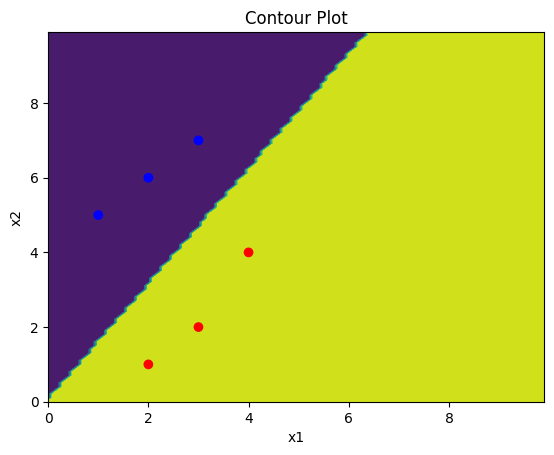

In [18]:
x, y = np.meshgrid(np.arange(0,10,0.1), np.arange(0,10,0.1))

z = np.dot(np.array([x, y]).T, w) + b
h = 1 / (1 + np.exp(-z))
p = np.where(h > 0.5, 1, 0)

import matplotlib.pyplot as plt

# add scatter plot on top of this from dataframe
plt.contourf(y, x, p)
plt.scatter(df['x1'], df['x2'], c=df['y'], cmap='bwr')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot')
plt.show()

import plotly.graph_objects as go
# plot the same data in 3d plotly
fig = go.Figure(data=[go.Surface( y=y, x=x, z=h)])
fig.update_layout(title='3D Contour Plot', autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()
